# Topic Modelling in Urdu Language
In this notebook i have implemented a NLP technique called Topic Modelling using a method called Latent Dirichlet Allocation (LDA).

##Installing required dependencies
First we will install all the required extrnal libraries.  

1.   The pyLDAvis library is used for the visualization part.
2.   The arabic_reshaper library is used to reshape arabic or urdu text.
3.   The python-bidi is used to make WordClouds in urdu language.  

<b>One thing to remember is that after installing pyLDAvis library you have to restart the run time again so that other dependencies are not affected by it.</b>


In [1]:
!pip install pyLDAvis
!pip install arabic_reshaper
!pip install python-bidi

##Mounting Google Drive
If the dataset is on Google Drive then you have to mount over google drive with collaboratory.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Importing required dependencies
We will import numpy, pandas and re library for now. other libraries will be imported in the notebook later. 

Pandas will be used to create a Dataframe and handle the csv file.
Numpy will be used for the faster computation of arrays to save time.
re library will be used for the cleaning of data.

In [3]:
import pandas as pd
import numpy as np
import re

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##DataFrame
df.head() is use to examine the top 5 rows of the data by default.

We have 1million total news in our dataset.
The link to the dataset is given below:

[Dataset](https://data.mendeley.com/datasets/834vsxnb99/3)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/urdu-news-dataset-1M.csv',encoding='utf-8')
df.head()

##Preprocessing of Data
We will remove some extra coloumns first like date,source,url and some other columns too. Because we want only news foe now and all other things are extra for us.

There are 5 types of news in the data set. If you want, you can use only 1 or 2 types of news in the example. But for this Notebook i am going to take all types of news for Topic Modelling.

In [29]:
data_pre=df.drop(columns=['Index','Date','URL','Source','News length'])
data_pre.head()
# data_pre=data_pre.loc[df['Category'] == 'Business & Economics']

,Headline,News Text,Category
0,عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی ...,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,Business & Economics
1,مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد م...,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,Business & Economics
2,جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ ...,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,Business & Economics
3,برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,Business & Economics
4,کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانو...,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,Business & Economics


##Removing all the extra punctuations
The re library is used here to remove extra spaces, new line, tab characters and all the other special characters and punctuations from the sentences.

In [31]:
data_pre['News Text'] = \
data_pre['News Text'].map(lambda x: re.sub('[,\\.!?]', '', str(x)))
data_pre['News Text'].head()

0    اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...
1    اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...
2    اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...
3    اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...
4    اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...
Name: News Text, dtype: object

##Stopwords
In nltk library there are many individual libraries for stopwords in different languages. If you found stopwords in urdu language in future then import nltk library and download them and use them. Otherwise I have make a stopword library in urdu by combining 3,4 different stopwords libraries. Now my stopword library has more than 900 stopwords in it. This is still not enough but if you want to add more stopwords in it then you can contribute to my github repository.

The stopword liibrary i have used is given in my repository which is on the link below:

[Stopwords Library](https://github.com/talhamasood0000/Topic_modelling_in_Urdu_LDA)

In [32]:
import nltk
stopwords=pd.read_csv('/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/stopwords_updated.txt',names=['List'])
# stopwords['List']

stopwords_ur=[]
for li in stopwords['List']:
  stopwords_ur.append(li)
print(len(stopwords_ur))

907


##Gensim

Gensim is the library that mainly focuses on Topic Modelling. It has all the models implemented in it and you just have to use them by applying input and parameters

In [45]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

##Remove Stopwords

In [46]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stopwords_ur] for doc in texts]

The data variable is an arry in which each index is 1 news.

In [53]:
data = data_pre['News Text'].values.tolist()
print((data[19]))

ممبئی بھارت کی معیشت جولائی اور ستمبر کے دوران 75 فیصد سکڑنے سے بدترین کارکردگی کا مظاہرہ کرنے والی بڑی ترقی یافتہ اور ابھرتی ہوئی معیشتوں میں شامل ہوگئی کیونکہ یہ ازادی کے بعد پہلی مرتبہ تکنیکی کساد بازاری میں داخل ہوئی ہےڈان اخبار میں شائع فرانسیسی خبررساں ادارے اے ایف پی کی رپورٹ میں بتایا گیا کہ سرکاری اعداد شمار ظاہر کرتے ہیں کہ معیشت کساد بازاری میں داخل ہوگئی ہےاگرچہ گزشتہ سہ ماہی میں ریکارڈ 239 فیصد سکڑنے کے مقابلے میں اعداد شمار میں بہتری تھی تاہم یہ اس طرف اشارہ کرتے ہیں کہ ایشیا کی تیسری بڑی معیشت سخت مقابلہ کر رہی ہے کیونکہ یہ طلب کو بحال کرنے اور روزگار پیدا کرنے کی کوششوں میں ہے جبکہ کورونا وائرس کا انفیکشن بڑھ رہا ہےمزید پڑھیں بھارت میں کورونا کی ابتر صورتحال ایک دن میں 90 ہزار سے زائد کیسز رپورٹتاہم مسلسل سہ ماہیوں میں معیشت کے سکڑنے کا مطلب ہے کہ ملک 1947 کے بعد سے پہلی مرتبہ تکنیکی کساد بزاری میں داخل ہوگیا ہےوائرس سے متعلق لاک ڈانز سے ہونے والی عالمی تباہی کے بعد امریکا جاپان اور جرمنی سمیت بڑی معیشتوں کی جانب سے 30 ستمبر کو ختم ہونے والی سہ ماہی میں ریکارڈ کی گئی تر

The data_words libray converts all of the words of the news in the indices of the array.

In [51]:
data_words = list(sent_to_words(data))
print(len(data_words))

111862


Then we remove all the extra words also called as 

In [54]:
data_words = remove_stopwords(data_words)
# print(data_words)

We will make a dictionary named id2word and then we will make a corpus from this dictionary. This creates a tuple with a unique id for each word in the document and its frequency.

In [55]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
print(id2word)
count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
# a,b=corpus[0][0]
# print(a,b)

# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

Dictionary(345975 unique tokens: ['اجرا', 'اخبار', 'اداروں', 'اسلام', 'اسمعیل']...)
0 اجرا
1 اخبار
2 اداروں
3 اسلام
4 اسمعیل
5 اضافی
6 اضافے
7 اضلاع
8 امکان
9 انضمام
10 ای


##LDA Model
Enter no of topics here and set parameters according to your need.

In [56]:
num_topics=5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

This will tell you the words in a topic and there weightage.

In [57]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"جی" + 0.019*"این" + 0.015*"گیس" + 0.012*"پانی" + 0.011*"تحت" + 0.011*"باد" + 0.011*"کراچی" + 0.011*"ڈی" + 0.010*"ایل" + 0.008*"بجلی"
Topic: 1 
Words: 0.032*"فلم" + 0.008*"خان" + 0.006*"ووڈ" + 0.005*"کردار" + 0.005*"بالی" + 0.005*"نيی" + 0.004*"سال" + 0.004*"دنیا" + 0.004*"ہويے" + 0.004*"وڈ"
Topic: 2 
Words: 0.020*"ٹیم" + 0.013*"پاکستان" + 0.010*"سیریز" + 0.008*"ون" + 0.008*"لینڈ" + 0.008*"ورلڈ" + 0.006*"حاصل" + 0.005*"محمد" + 0.005*"جنوبی" + 0.005*"فاينل"
Topic: 3 
Words: 0.062*"روپے" + 0.034*"ڈالر" + 0.030*"قیمت" + 0.021*"ارب" + 0.018*"کروڑ" + 0.016*"مارکیٹ" + 0.015*"سونے" + 0.014*"اضافہ" + 0.014*"لاکھ" + 0.013*"ہزار"
Topic: 4 
Words: 0.015*"پاکستان" + 0.011*"ٹیکس" + 0.011*"ایف" + 0.009*"حکومت" + 0.008*"بی" + 0.006*"مطابق" + 0.006*"بینک" + 0.006*"جانب" + 0.006*"ایم" + 0.006*"فايل"


##Visualization

All these libraries will be helpful in visualizing the output of the model

In [58]:
import pyLDAvis
import pickle 
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.330222  0.010635       1        1  37.369206
4      0.113111  0.249892       2        1  26.551680
2     -0.255716 -0.171004       3        1  24.282734
3     -0.252545  0.260868       4        1   8.047650
0      0.064927 -0.350391       5        1   3.748729, topic_info=       Term           Freq          Total Category  logprob  loglift
185    روپے   94258.000000   94258.000000  Default  30.0000  30.0000
9131    فلم  186350.000000  186350.000000  Default  29.0000  29.0000
132    ڈالر   43894.000000   43894.000000  Default  28.0000  28.0000
2395    ٹیم   75051.000000   75051.000000  Default  27.0000  27.0000
638    قیمت   38388.000000   38388.000000  Default  26.0000  26.0000
...     ...            ...            ...      ...      ...      ...
574      پی    3205.111082   25493.591335   Topic5  -5.2208   1.2101
1415  کیليے    3290.525078   44005.780968   Topic5  -5.1945   0.6905
1103   پورٹ    2262.543126    3756.919318   Topic5  -5.5691   2.7766
7572   تھری    2310.650344    5917.854228   Topic5  -5.5481   2.3433
36     جايے    2317.028203   47265.939278   Topic5  -5.5453   0.2682

[308 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
38855      3  0.999926  ابراہم
480        2  0.999785   اجلاس
480        3  0.000155   اجلاس
481        1  0.784259     ادا
481        2  0.170125     ادا
...      ...       ...     ...
252        4  0.011768    ہويے
934        1  0.184609   ہوگيی
934        2  0.034005   ہوگيی
934        3  0.244464   ہوگيی
934        4  0.536963   ہوگيی

[645 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

This part is extra part and it is used to generate the WordClound in urdu language. One font file is also required for its working, which is available in the repository.

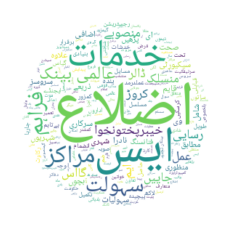

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi.algorithm import get_display
from arabic_reshaper import ArabicReshaper

long_string = ','.join(list(data_words[0]))


configuration = {"language": "Urdu"}

reshaper = ArabicReshaper(configuration=configuration)

text = reshaper.reshape(long_string)
text = get_display(text)


x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white",font_path='/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/NotoNaskhArabic-Regular.ttf', repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")